In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Market Value Model 

In [333]:
value_all_players = pd.read_csv("upd_pldata.csv")
value_all_data = value_all_players.dropna()

In [334]:
value_all_players.columns = value_all_players.columns.str.replace('.', '_')
value_all_players.columns = value_all_players.columns.str.replace('___', '_')
value_all_players.columns = value_all_players.columns.str.replace(' ', '_')

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_25712/1519655258.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  value_all_players.columns = value_all_players.columns.str.replace('.', '_')


In [335]:
final_value_all_players = pd.DataFrame(value_all_players, columns = ["Name"])
final_value_all_players["actual"] = value_all_players['Value'].copy()

In [336]:
from sklearn.model_selection import train_test_split
value_all_train, value_all_test = train_test_split(value_all_players, test_size = .2, shuffle = True)

#final_value_all_players = pd.DataFrame(at_test, columns = ["Name"])
#final_value_all_players["actual"] = at_test['Value'].copy()


#getting the target vector and deleting it from feature matrix

X_train_value = value_all_train.dropna(how='any', inplace=True)
X_train_value = value_all_train.drop(["Value"], axis = 1)
y_train_value = value_all_train["Value"]



X_test_value = value_all_test.dropna(how='any', inplace=True)
X_test_value = value_all_test.drop(["Value"], axis = 1)
y_test_value = value_all_test["Value"]

X_train_value = X_train_value.drop(["field_position"], axis = 1)
X_train_value = X_train_value.drop(["Name"], axis = 1)




X_test_value = X_test_value.drop(["field_position"], axis = 1)
X_test_value = X_test_value.drop(["Name"], axis = 1)

# print(X_train_value_all)
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train_value_all = sc.fit_transform(X_train_value_all)
#y_train_value_all = sc.fit_transform(y_train_value_all)

#X_test_value_all = sc.fit_transform(X_test_value_all)
#y_test_value_all = sc.fit_transform(y_test_value_all)

In [337]:
#X_train_value_all.dropna(how='any', inplace=True)

In [338]:
X_train_value

,Age,Overall_rating,Potential,Years_Left,Total_stats,Wage,Release_clause,Total_attacking,Crossing,Finishing,...,GK_Positioning,GK_Reflexes,Weak_foot,Skill_moves,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defending_Pace,Physical_Positioning
2503,22,74,79,4.0,1819,30000.0,12800000.0,310,76,53,...,6,8,2,2,69,56,69,65,74,66
1447,32,76,76,0.0,1966,30000.0,10200000.0,368,67,73,...,7,8,4,2,38,74,72,68,74,77
5450,28,70,70,2.0,1692,7000.0,2400000.0,319,46,71,...,14,12,3,2,57,70,57,61,39,67
4604,22,71,78,3.0,1727,15000.0,5900000.0,251,68,30,...,14,9,3,3,81,34,59,70,68,66
3198,28,73,73,1.0,2013,9000.0,5200000.0,315,73,66,...,6,10,3,3,64,71,75,70,65,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,24,72,77,3.0,1890,10000.0,8500000.0,306,56,55,...,13,14,4,3,66,64,68,69,66,67
1349,33,76,76,0.0,1911,60000.0,9200000.0,378,66,77,...,9,6,4,3,58,77,71,73,43,67
3560,21,72,75,1.0,1907,5000.0,6300000.0,302,55,62,...,10,12,4,3,86,63,64,75,62,57
2085,37,75,75,1.0,1164,10000.0,765000.0,87,17,12,...,78,74,3,1,72,77,68,74,39,78


In [339]:
X_train_value.columns

Index(['Age', 'Overall_rating', 'Potential', 'Years_Left', 'Total_stats',
       'Wage', 'Release_clause', 'Total_attacking', 'Crossing', 'Finishing',
       'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill',
       'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control',
       'Total_movement', 'Acceleration', 'Sprint_speed', 'Agility',
       'Reactions', 'Balance', 'Total_power', 'Shot_power', 'Jumping',
       'Stamina', 'Strength', 'Long_shots', 'Total_mentality', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Marking', 'Standing_tackle', 'Sliding_tackle',
       'Total_goalkeeping', 'GK_Diving', 'GK_Handling', 'GK_Kicking',
       'GK_Positioning', 'GK_Reflexes', 'Weak_foot', 'Skill_moves',
       'Pace_Diving', 'Shooting_Handling', 'Passing_Kicking',
       'Dribbling_Reflexes', 'Defending_Pace', 'Physical_Positioning'],
      dtype='object')

## Feature Selection

In [340]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train_value, y_train_value)
mutual_info

array([0.4905856 , 1.03841895, 1.05968144, 0.07246043, 0.20571659,
       0.35662188, 2.27805299, 0.17748061, 0.07192862, 0.09929788,
       0.0547768 , 0.21217571, 0.06703996, 0.14562138, 0.24314665,
       0.07669758, 0.02859152, 0.10846393, 0.30271662, 0.07794648,
       0.0932485 , 0.08023595, 0.04050479, 0.37264494, 0.05031291,
       0.09875495, 0.0744433 , 0.01151016, 0.07537393, 0.01365796,
       0.10309282, 0.12301613, 0.02014485, 0.16093953, 0.16626519,
       0.14282174, 0.04919805, 0.19878933, 0.21252084, 0.13281367,
       0.18756584, 0.16174314, 0.06511414, 0.03866179, 0.05858453,
       0.01639181, 0.040265  , 0.06966433, 0.01257774, 0.12304478,
       0.06456738, 0.16737898, 0.17501522, 0.25705098, 0.19539382,
       0.06036168])

In [341]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_value.columns
ordered_mutual_info = mutual_info.sort_values(ascending=False)

<AxesSubplot: >

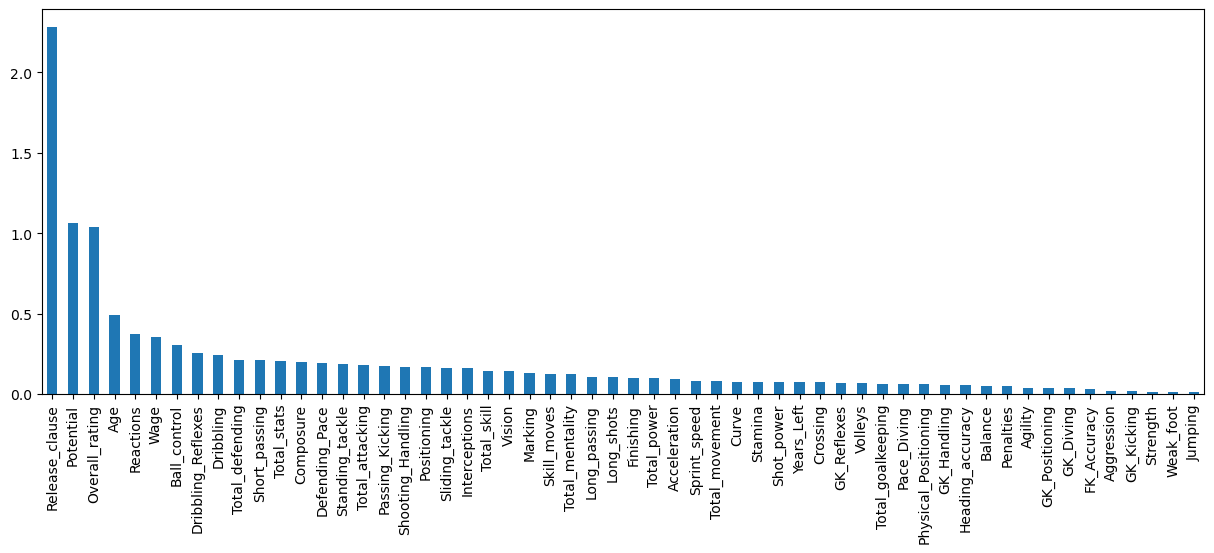

In [342]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [343]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=30)
selected_top_columns.fit(X_train_value, y_train_value)
selected_top_columns.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False])

In [344]:
X_train_value.columns[selected_top_columns.get_support()]

Index(['Age', 'Overall_rating', 'Potential', 'Total_stats', 'Wage',
       'Release_clause', 'Total_attacking', 'Short_passing', 'Dribbling',
       'Ball_control', 'Reactions', 'Composure', 'Total_defending',
       'Standing_tackle', 'Passing_Kicking', 'Dribbling_Reflexes',
       'Defending_Pace'],
      dtype='object')

In [345]:
X_train_value_sel = X_train_value[['Age', 'Overall_rating', 'Potential', 'Total_stats', 'Wage',
       'Release_clause', 'Total_attacking', 'Short_passing', 'Dribbling',
       'Ball_control', 'Reactions', 'Positioning', 'Composure',
       'Total_defending', 'Passing_Kicking', 'Dribbling_Reflexes',
       'Defending_Pace']]


X_test_value_sel = X_test_value[['Age', 'Overall_rating', 'Potential', 'Total_stats', 'Wage',
       'Release_clause', 'Total_attacking', 'Short_passing', 'Dribbling',
       'Ball_control', 'Reactions', 'Positioning', 'Composure',
       'Total_defending', 'Passing_Kicking', 'Dribbling_Reflexes',
       'Defending_Pace']]

In [346]:
from sklearn.linear_model import Lasso
Lol8 = Lasso(alpha = 1, max_iter = 4000)

Lol8.fit(X_train_value, y_train_value)

/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.250e+15, tolerance: 3.141e+13
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1, max_iter=4000)

In [347]:
Lol8.score(X_test_value, y_test_value)

0.9889101634883111

In [348]:
Lol8.coef_

array([-4.89896798e+04,  1.99150424e+05, -8.22212454e+04, -5.77791666e+04,
        1.01001478e+04,  6.93711277e+00,  4.78280413e-01, -1.42469872e+04,
       -9.73989659e+02,  1.91759081e+02, -2.13329070e+03, -6.71862731e+03,
        1.31601786e+04, -1.11203286e+04, -4.04781910e+03, -1.33782802e+03,
        3.80500853e+03,  8.08916249e+03,  4.42096394e+03, -1.51117763e+04,
       -5.66958459e+03, -1.62049374e+03,  8.00588928e+03,  7.14058959e+03,
        7.42360748e+03, -8.86135425e+03, -2.40304417e+03, -1.06838072e+03,
        6.26928005e+03, -2.01859946e+03, -7.62299964e+02, -1.29521772e+04,
       -5.22172711e+03,  4.31526456e+02,  2.35974917e+03,  1.87252251e+03,
        4.40857685e+03, -1.08335467e+03, -1.69755669e+04,  3.99748753e+03,
       -6.17286288e+03,  1.89737667e+03, -1.72270551e+04,  8.77930846e+02,
       -4.89865686e+03,  3.21354591e+03, -2.25750416e+02,  5.29732821e+03,
        1.33949381e+04,  5.11842697e+03,  1.22568680e+04, -9.46980129e+03,
        4.27575703e+03,  

In [349]:
from sklearn.ensemble import RandomForestRegressor

In [350]:
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train_value, y_train_value)

RandomForestRegressor(max_depth=5, random_state=0)

In [351]:
regr.score(X_test_value, y_test_value)

0.987896994481562

In [358]:
#cross-validation
import time as tm
start = tm.time()

from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(regr, X_train_value, y_train_value, cv=5)
print(model_scores.mean())


running_secs = (tm.time() - start)



0.9794776578342885


In [359]:
print(running_secs)

14.303798198699951


In [360]:
#cross-validation
import time as tm
start = tm.time()

from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(regr, X_train_value_sel, y_train_value, cv=5)
print(model_scores.mean())

running_secs = (tm.time() - start)

0.981009669685089


In [361]:
print(running_secs)

4.912126064300537


Take-Away: Big Computational Efficiency Difference with decreased # of features 

## Experiments

Notes: time to run might take longer with more features even though accuracy doesn't change; vary the # of samples and see how that affects the learning curves

In [354]:
#all features time to run vs. feature selection time to run

In [255]:
X_train_value.iloc[:, 0:3] #get all rows for certain columns; use this in the loop, but no b/cuz we need to go from most important to least important

,Age,Overall_rating,Potential
2076,26,75,77
3664,24,72,74
4226,28,71,72
1751,24,75,79
1882,29,75,75
...,...,...,...
40,24,87,92
657,27,79,79
2779,20,73,84
4172,29,71,71


In [320]:
((ordered_mutual_info).index[0]) #use this to loop

#X_train_value.iloc[:, 0:ordered_mutual_info.index[0]]

'Release_clause'

In [375]:
import warnings
warnings.filterwarnings('ignore')

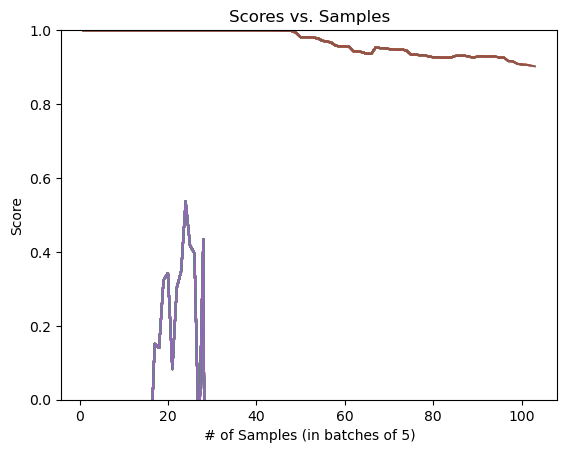

In [399]:
#effect of overfitting, keeping # features constant and increasing samples (good for when we get new dataset);

#effect of overfitting, keeping # samples constant and increasing features (good for when we get new dataset);


#initialize arrays to store scores
train_score_hist = []
cv_score_hist = []


#loop through features:
for i in range(1, len(ordered_mutual_info)):
    #fit on training; I don't think I should refit everytime!!!!!
    L6 = Lasso(alpha = 1) 
    L6.fit(X_train_value.iloc[:, 0:ordered_mutual_info.index[i]], y_train_value.iloc[0:i])
    
    #score on training
    #print(L6.score(X_train_fee.iloc[0:i],y_train_fee.iloc[0:i]))
    train_score_hist.append(L6.score(X_train_fee.iloc[:, 0:i],y_train_value.iloc[:, 0:i]))  #update model's training score
    
    #cross-validation
    cv_score_hist.append(cross_val_score(L6, X_train_fee.iloc[0:i], y_train_fee.iloc[0:i], cv=5).mean())
 

    #Graph it
    num_steps = len(train_score_hist)
    plt.plot(np.arange(num_steps) + 1, cv_score_hist, label = "cross_val")

    num_steps = len(train_score_hist)
    plt.plot(np.arange(num_steps) + 1, train_score_hist, label = "train")

    plt.ylim([0, 1])
    #change x to be in batches of 5
    labels = plt.gca().set(title = "Scores vs. Samples", xlabel = "# of Samples (in batches of 5)", ylabel = "Score")


    
#loop through features:

#for i in rang

#effect of overfitting, w/ our # of samples, changing the number of features 

# Bias Auditing

In [24]:
## How do we choose the threshold for market value?; we could do an even tier system??

In [25]:
all_players["Value"].mean() #use the mean i guess

6735124.561403509

In [26]:
all_players["Value"].median() #use the median, maybe; there's some crazy outliers pushing the mean up i guess

4100000.0

In [27]:
#add value threshold and drop value, drop nationality (need a dataset with nationality), predict value threshold

In [28]:
all_players["ValueThreshold"] = all_players['Value'] < 4100000.0

In [29]:
from sklearn.model_selection import train_test_split
all_train, all_test = train_test_split(all_players, test_size = .2, shuffle = True)

#final_all_players = pd.DataFrame(at_test, columns = ["Name"])
#final_all_players["actual"] = at_test['Value'].copy()


#getting the feature matrix and  target vector and deleting it from feature matrix

X_train_all = all_train.dropna(how='any', inplace=True)
X_train_all = all_train.drop(["Value"], axis = 1)
X_train_all = all_train.drop(["ValueThreshold"], axis = 1)
y_train_all = all_train["ValueThreshold"]



X_test_all = all_test.dropna(how='any', inplace=True)
X_test_all = all_test.drop(["Value"], axis = 1)
X_test_all = all_test.drop(["ValueThreshold"], axis = 1)
y_test_all = all_test["ValueThreshold"]

X_train_all = X_train_all.drop(["field_position"], axis = 1)
X_train_all = X_train_all.drop(["Name"], axis = 1)




X_test_all = X_test_all.drop(["field_position"], axis = 1)
X_test_all = X_test_all.drop(["Name"], axis = 1)

In [30]:
#use classification model, try different ones

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf_class = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_class.fit(X_train_all, y_train_all)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [32]:
clf_class.score(X_test_all, y_test_all)

0.9586693548387096

In [33]:
#gather predictions
predictions = clf_class.predict(X_test_all)
actual = y_test_all

In [34]:
(predictions == actual).mean()

0.9586693548387096

In [35]:
bias_ds = all_test.copy()
bias_ds.rename(columns={'ValueThreshold':'Actual'}, inplace=True) #rename ValueThreshold to Actual
bias_ds["Predicted"] = predictions

In [36]:
bias_ds.head(3)

,Name,Age,Overall_rating,Potential,Years_Left,field_position,Total_stats,Value,Wage,Release_clause,...,Weak_foot,Skill_moves,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defending_Pace,Physical_Positioning,Actual,Predicted
1262,G. Castro,31,76,76,2.0,Midfielder,2055,6500000.0,30000.0,11100000.0,...,4,3,67,69,77,77,68,66,False,False
1730,A. Maier,19,75,87,3.0,Midfielder,1836,11500000.0,10000.0,21900000.0,...,3,3,69,56,72,74,68,69,False,False
227,Casillas,37,83,83,1.0,Goalkeeper,1306,1700000.0,10000.0,3500000.0,...,2,1,87,76,61,84,55,85,True,False


In [37]:
group_test = bias_ds["field_position"]

In [38]:
group_test == "Attacker"

1262    False
1730    False
227     False
3121    False
4965    False
        ...  
4699    False
3944    False
3858     True
1696    False
3533    False
Name: field_position, Length: 992, dtype: bool

### Calibration

As defined by Chouldechova in [this paper](https://via.hypothes.is/https://arxiv.org/pdf/1703.00056.pdf), "a score S = S(x) is said to be well-calibrated if it reflects the same
likelihood of recidivism irrespective of the individuals’ group membership."

In our context, when we are doing binary classification for sex-based income, the calibration takes on the form of the PPV.
Namely, our model would be well-calibrated if the fraction of predicted individuals making >\\$50k who actually make >\\$50k is the same across groups.

In [39]:
bias_ds_calibration = bias_ds.query("Predicted == True")

In [40]:
bias_ds_calibration = bias_ds_calibration.groupby(["field_position", "Predicted"])["Actual"].mean().reset_index(name = "mean")

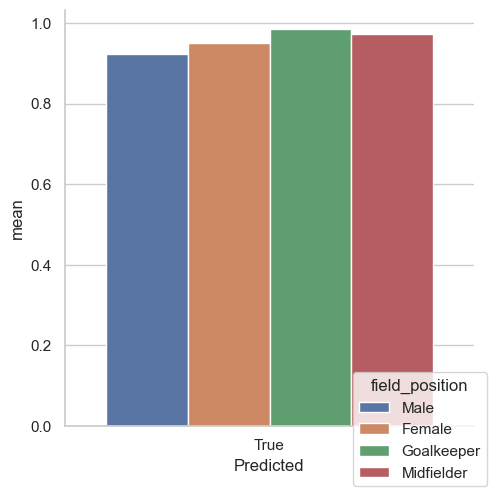

In [43]:
sns.set_theme(style="whitegrid")

p = sns.catplot(data = bias_ds_calibration, kind = "bar", x = "Predicted", y = "mean", hue = "field_position", legend_out = False)
new_labels = ['Male', 'Female']
for t, l in zip(p._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(p, "lower right")

### Error Rate Balance

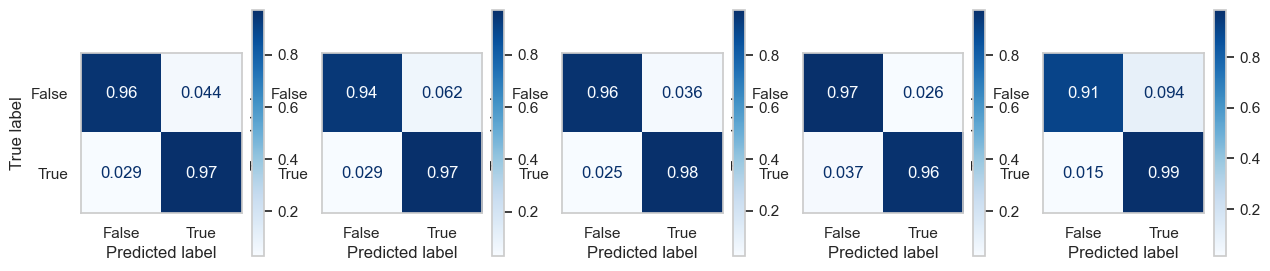

In [1789]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig, axarr = plt.subplots(1, 5, figsize=(15,3.2), sharex = False, sharey = False)

cm1 = confusion_matrix(actual, predictions, labels=clf_class.classes_, normalize = "true")
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=clf_class.classes_)

cm2 = confusion_matrix(actual[group_test == "Attacker"], predictions[group_test == "Attacker"], labels=clf_class.classes_, normalize = "true")
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=clf_class.classes_)


cm3 = confusion_matrix(actual[group_test == "Midfielder"], predictions[group_test == "Midfielder"], labels=clf_class.classes_, normalize = "true")
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=clf_class.classes_)

cm4 = confusion_matrix(actual[group_test == "Defender"], predictions[group_test == "Defender"], labels=clf_class.classes_, normalize = "true")
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4,
                              display_labels=clf_class.classes_)

cm5 = confusion_matrix(actual[group_test == "Goalkeeper"], predictions[group_test == "Goalkeeper"], labels=clf_class.classes_, normalize = "true")
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5,
                              display_labels=clf_class.classes_)

disp1.plot(ax=axarr[0], cmap = plt.cm.Blues)
axarr[0].grid(visible=None)

disp2.plot(ax=axarr[1], cmap = plt.cm.Blues)
axarr[1].grid(visible=None)

disp3.plot(ax=axarr[2], cmap = plt.cm.Blues)
axarr[2].grid(visible=None)

disp4.plot(ax=axarr[3], cmap = plt.cm.Blues)
axarr[3].grid(visible=None)

disp5.plot(ax=axarr[4], cmap = plt.cm.Blues)
axarr[4].grid(visible=None)

## Statistical Parity

In [44]:
bias_ds_statParity = bias_ds.groupby(["field_position"], as_index=False)["Predicted"].value_counts(normalize = True) #normalize = True not working sadly

In [45]:
bias_ds_statParity #query it just for true

,field_position,Predicted,proportion
0,Attacker,False,0.572464
1,Attacker,True,0.427536
2,Defender,True,0.548495
3,Defender,False,0.451505
4,Goalkeeper,True,0.626263
5,Goalkeeper,False,0.373737
6,Midfielder,False,0.534591
7,Midfielder,True,0.465409


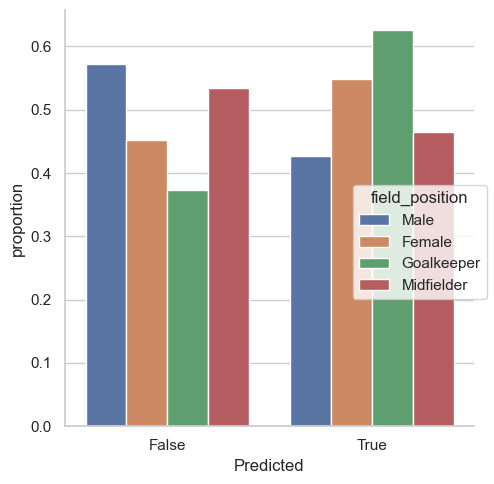

In [49]:
sns.set_theme(style="whitegrid")

p = sns.catplot(data = bias_ds_statParity, kind = "bar", x = "Predicted", y = "proportion", hue = "field_position", legend_out = False)
new_labels = ['Male', 'Female']
for t, l in zip(p._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(p, "center right")

# Tranfer Fee Model

In [412]:
tf_data = pd.read_csv("TM_MV_Club.csv")

In [413]:
#clean column names

tf_data.columns = tf_data.columns.str.replace('.', '_')
tf_data.columns = tf_data.columns.str.replace('___', '_')
tf_data.columns = tf_data.columns.str.replace(' ', '_')

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_17272/61169314.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tf_data.columns = tf_data.columns.str.replace('.', '_')


In [414]:
tf_data.head(3)

,Name,club,name,transfer_fee,Position,league,detailed_position,Squad,AVGage,Foreigners,...,International_reputation,Body_type,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defending_Pace,Physical_Positioning,Years_Left,Club
0,A. Ajeti,West Ham United,A. Ajeti,€11.30m,Forward,Premier League,Centre-Forward,37,26.6,23,...,1,Normal (170-185),79,71,59,69,29,76,3.0,Basel\n
1,A. Cerri,Cagliari Calcio,A. Cerri,€9.00m,Forward,Serie A,Centre-Forward,49,25.9,18,...,1,Normal (185+),62,72,54,68,39,76,4.0,Cagliari\n
2,A. Diawara,AS Roma,A. Diawara,€21.00m,Midfield,Serie A,Defensive Midfield,57,23.7,27,...,2,Lean (170-185),68,54,73,77,72,73,2.0,Napoli\n


In [415]:
tf_data.columns

Index(['Name', 'club', 'name', 'transfer_fee', 'Position', 'league',
       'detailed_position', 'Squad', 'AVGage', 'Foreigners',
       'TotalPlayerValue', 'League_x', 'Pos', 'GP', 'W', 'D', 'L', 'GR', 'GD',
       'Points', 'Age', 'Overall_rating', 'Potential', 'ID', 'Height',
       'Weight', 'foot', 'Best_overall', 'Best_position', 'Growth', 'Joined',
       'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Total_mentality',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Total_defending', 'Marking', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 

In [416]:
tf_data.head(3)

,Name,club,name,transfer_fee,Position,league,detailed_position,Squad,AVGage,Foreigners,...,International_reputation,Body_type,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defending_Pace,Physical_Positioning,Years_Left,Club
0,A. Ajeti,West Ham United,A. Ajeti,€11.30m,Forward,Premier League,Centre-Forward,37,26.6,23,...,1,Normal (170-185),79,71,59,69,29,76,3.0,Basel\n
1,A. Cerri,Cagliari Calcio,A. Cerri,€9.00m,Forward,Serie A,Centre-Forward,49,25.9,18,...,1,Normal (185+),62,72,54,68,39,76,4.0,Cagliari\n
2,A. Diawara,AS Roma,A. Diawara,€21.00m,Midfield,Serie A,Defensive Midfield,57,23.7,27,...,2,Lean (170-185),68,54,73,77,72,73,2.0,Napoli\n


In [417]:
#drop not useful, non-numerical columns
#tf_data = tf_data.dropna(how='any', inplace=True)
tf_data = tf_data.drop(["Name"], axis = 1)
tf_data = tf_data.drop(["club"], axis = 1)
tf_data = tf_data.drop(["Position"], axis = 1)
tf_data = tf_data.drop(["Best_position"], axis = 1)
tf_data = tf_data.drop(["league"], axis = 1)
tf_data = tf_data.drop(["detailed_position"], axis = 1)
tf_data = tf_data.drop(["Squad"], axis = 1)
tf_data = tf_data.drop(["TotalPlayerValue"], axis = 1)
tf_data = tf_data.drop(["GR"], axis = 1)
tf_data = tf_data.drop(["League_x"], axis = 1)
tf_data = tf_data.drop(["Joined"], axis = 1)
tf_data = tf_data.drop(["Loan_date_end"], axis = 1)
tf_data = tf_data.drop(["Release_clause"], axis = 1)
tf_data = tf_data.drop(["Attacking_work_rate"], axis = 1)
tf_data = tf_data.drop(["Defensive_work_rate"], axis = 1)
tf_data = tf_data.drop(["International_reputation"], axis = 1)
tf_data = tf_data.drop(["Body_type"], axis = 1)
tf_data = tf_data.drop(["Club"], axis = 1)
tf_data = tf_data.drop(["name"], axis = 1)
tf_data = tf_data.drop(["foot"], axis = 1)

In [418]:
#clean target vector
tf_data ["transfer_fee"] = tf_data ["transfer_fee"].str.replace('€', '') #regex to remove € and m

# Drop rows that contain loan fee: https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p
tf_data = tf_data[~tf_data .transfer_fee.str.contains("Loan fee:")]

# Multiply all occurrences of "m" by 1 million
tf_data ['transfer_fee'] = tf_data ['transfer_fee'].str.replace('m', '').astype(float) * 1000000

## Feature Analysis (visualizations, relationships w/ each other and with tranfer fee)

In [423]:
#sns.barplot(data = tf_data, x = "position", y = "transfer_fee")

ValueError: Could not interpret input 'position'

<AxesSubplot: xlabel='Skill_moves', ylabel='transfer_fee'>

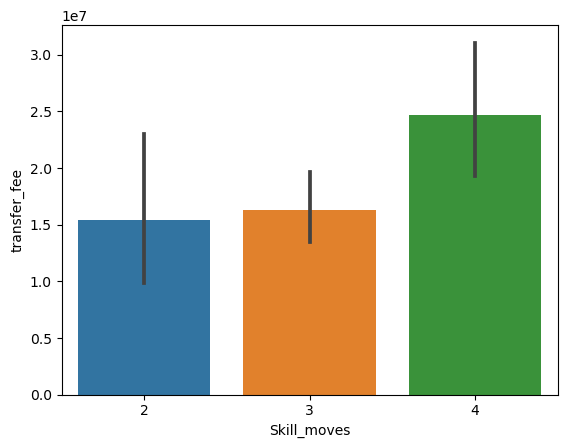

In [420]:
sns.barplot(data = tf_data, x = "Skill_moves", y = "transfer_fee")

<AxesSubplot: xlabel='Overall_rating', ylabel='transfer_fee'>

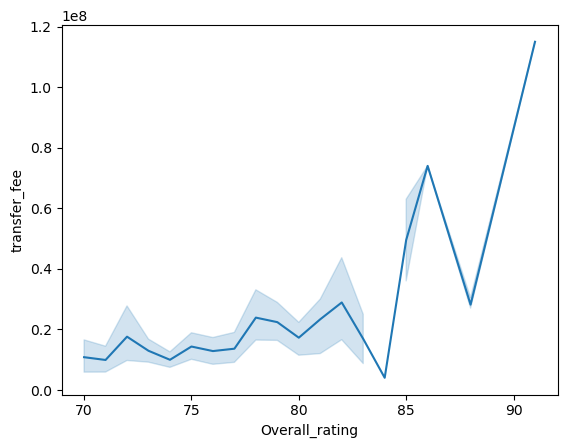

In [348]:
sns.lineplot(data = tf_data, x = "Overall_rating", y = "transfer_fee")

In [ ]:
pairplot

In [342]:
#try pairplot

In [329]:
tf_data.columns

Index(['transfer_fee', 'AVGage', 'Foreigners', 'Pos', 'GP', 'W', 'D', 'L',
       'GD', 'Points', 'Age', 'Overall_rating', 'Potential', 'ID', 'Height',
       'Weight', 'Best_overall', 'Growth', 'Value', 'Wage', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Total_mentality',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Total_defending', 'Marking', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handling',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Skill_moves', 'Pace_Diving',
       'Shooting_Handling', 'Passing_Kicking

In [279]:
from sklearn.model_selection import train_test_split
all_tf_train, all_tf_test = train_test_split(tf_data, test_size = .2, shuffle = True)

In [280]:
# #This makes the accuracy skyrocket and modeling work as expected, but why???
#This is weird!!!
# all_tf_train = all_tf_train.reset_index(drop=True)
# all_tf_test = all_tf_test.reset_index(drop=True)

In [281]:
# all_tf_train=all_tf_train.drop(["level_0"], axis = 1)
# all_tf_train=all_tf_train.drop(["index"], axis = 1)

# all_tf_test=all_tf_test.drop(["level_0"], axis = 1)
# all_tf_test=all_tf_test.drop(["index"], axis = 1)

In [282]:
#getting the feature matrix and target vector
all_tf_train.dropna(how='any', inplace=True)
X_train_fee = all_tf_train.drop(["transfer_fee"], axis = 1)
y_train_fee = all_tf_train["transfer_fee"]

all_tf_test.dropna(how='any', inplace=True)
X_test_fee = all_tf_test.drop(["transfer_fee"], axis = 1)
y_test_fee = all_tf_test["transfer_fee"] # do this to get it by index; want to reset the index

## Model Comparisons + Cross-Validation + Hyperparameter Tuning https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [120]:
from sklearn.linear_model import Lasso
L5 = Lasso(alpha = 1010)
L5.fit(X_train_fee, y_train_fee)
L5.score(X_test_fee, y_test_fee)

/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.831e+16, tolerance: 1.450e+13
  model = cd_fast.enet_coordinate_descent(


0.3451164863267083

In [121]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 5, random_state=0)
regr.fit(X_train_fee, y_train_fee)
regr.score(X_test_fee, y_test_fee)

0.36014667938904654

In [122]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train_fee, y_train_fee)
neigh.score(X_test_fee, y_test_fee)

-0.45651028924742687

In [286]:
#cross-validation
from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(regr, X_train_fee, y_train_fee, cv=5)
print(model_scores.mean())

0.3387909338482892


#### Take-Away: Huge discrepancy between holdout method and cross validation method, due to sample size??? double check with larger dataset, and do an experiment

## Experiment: Holdout Set Vs. Cross-Validation Method comparison by Sample Size, # of features

In [246]:
print(len(X_test_fee.columns))

109
30
71


In [ ]:
#This function helps modify our given feature array by adding column of 1's 
def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

#This function will create both testing and validation data 
def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = 1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

In [ ]:
#choose # of samples and features
n_train = 112
n_val = 27
p_features = 1

#adjusts variability of the data
noise = 0.5

#initialize arrays to store scores
train_score_hist = []
val_score_hist = []


# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)


#Record the score on training and validation as the #features increases
for i in range(n_train-1):
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, i, noise) #create data; #i is the p_features
    lr.fit_analytic(X_train, y_train) #fit
    train_score_hist.append(lr.score(X_train, y_train)) #update model's training score
    val_score_hist.append((lr.score(X_val, y_val))) #update model's validation score
    
#Graph it
num_steps = len(val_score_hist)
plt.plot(np.arange(num_steps) + 1, val_score_hist, label = "val")

num_steps = len(train_score_hist)
plt.plot(np.arange(num_steps) + 1, train_score_hist, label = "train")

plt.ylim([0, 1])
labels = plt.gca().set(title = "Scores vs. Features", xlabel = "# of Features", ylabel = "Score")

In [199]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:



NameError: name 'rf' is not defined

In [ ]:
leaf_size = []

In [102]:
# Create the random grid
random_grid = {'leaf_size': leaf_size,
               'n_neighbors': min_samples_split,
               'p': min_samples_leaf,
               'weights': bootstrap}

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}


In [101]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
SVR = make_pipeline(StandardScaler(), SVR(C=.05, epsilon=0.2))
SVR.fit(X_train_fee, y_train_fee)
SVR.score(X_train_fee, y_train_fee)


-0.08488753917777081

In [98]:
from sklearn.linear_model import Perceptron
per = Perceptron()
per.fit(X_train_fee, y_train_fee)
per.score(X_test_fee, y_test_fee)


0.009259259259259259

## Feature Importance  https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance

## Learning Curves (by models)

In [395]:
X_train_fee.iloc[0:3]

,AVGage,Foreigners,Pos,GP,W,D,L,GD,Points,Age,...,Base_stats,Weak_foot,Skill_moves,Pace_Diving,Shooting_Handling,Passing_Kicking,Dribbling_Reflexes,Defending_Pace,Physical_Positioning,Years_Left
48,26.4,26,9,38,15,7,16,3,52,24,...,423,4,4,71,70,77,78,61,66,2.0
87,24.4,22,5,38,19,11,8,19,68,20,...,415,3,3,71,70,72,74,64,64,2.0
175,25.4,20,4,38,23,2,13,28,71,20,...,436,2,4,89,75,74,85,40,73,4.0


In [375]:
import warnings
warnings.filterwarnings('ignore')

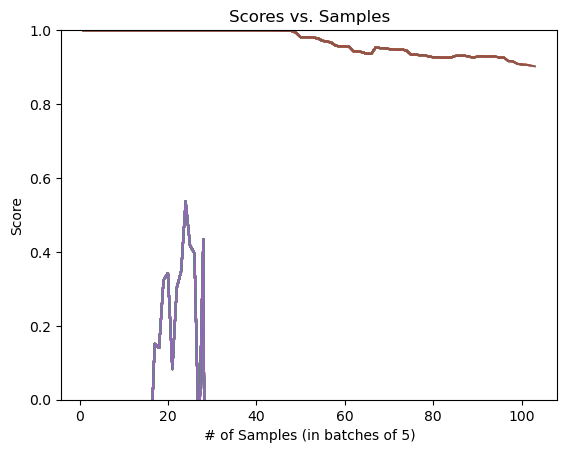

In [399]:
#effect of overfitting, keeping # features constant and increasing samples (good for when we get new dataset);

#effect of overfitting, keeping # samples constant and increasing features (good for when we get new dataset);


#initialize arrays to store scores
train_score_hist = []
cv_score_hist = []


#loop through samples:
for i in range(5, len(X_train_fee)):
    #fit on training; I don't think I should refit everytime!!!!!
    L6 = Lasso(alpha = 1) 
    L6.fit(X_train_fee.iloc[0:i], y_train_fee.iloc[0:i])
    
    #score on training
    #print(L6.score(X_train_fee.iloc[0:i],y_train_fee.iloc[0:i]))
    train_score_hist.append(L6.score(X_train_fee.iloc[0:i],y_train_fee.iloc[0:i]))  #update model's training score
    
    #cross-validation
    cv_score_hist.append(cross_val_score(L6, X_train_fee.iloc[0:i], y_train_fee.iloc[0:i], cv=5).mean())
 

    #Graph it
    num_steps = len(train_score_hist)
    plt.plot(np.arange(num_steps) + 1, cv_score_hist, label = "cross_val")

    num_steps = len(train_score_hist)
    plt.plot(np.arange(num_steps) + 1, train_score_hist, label = "train")

    plt.ylim([0, 1])
    #change x to be in batches of 5
    labels = plt.gca().set(title = "Scores vs. Samples", xlabel = "# of Samples (in batches of 5)", ylabel = "Score")


    
#loop through features:

#for i in rang

#effect of overfitting, w/ our # of samples, changing the number of features 

In [ ]:
#loop through number of samples, checking training and validation score for each...

#if training score is still increasing by the time we reach last sample then we probably need more training data

In [326]:
#choose # of samples and features
n_train = 100
n_val = 100
p_features = 1

#adjusts variability of the data
noise = 0.5

#initialize arrays to store scores
train_score_hist = []
val_score_hist = []


# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

print(X_train)

#Record the score on training and validation as the #features increases
for i in range(n_train-1):
    #X_train, y_train, X_val, y_val = LR_data(n_train, n_val, i, noise) #create data; #i is the p_features
    lr.fit_analytic(X_train, y_train) #fit
    #train_score_hist.append(lr.score(X_train, y_train)) #update model's training score
    val_score_hist.append((lr.score(X_val, y_val))) #update model's validation score
    
#Graph it
num_steps = len(val_score_hist)
plt.plot(np.arange(num_steps) + 1, val_score_hist, label = "val")

num_steps = len(train_score_hist)
plt.plot(np.arange(num_steps) + 1, train_score_hist, label = "train")

plt.ylim([0, 1])
labels = plt.gca().set(title = "Scores vs. Features", xlabel = "# of Features", ylabel = "Score")



NameError: name 'LR_data' is not defined

In [1010]:
#should we focus on optimizing this model for rn?
#or
#add real player stats (not collected yet) and try to switch out target vector to tranfermrkt.com values (still subjective, not collected)
###just testing how good fifa's predictions are compared to tranfsermrkt.com; ehh

#I THINK THIS IS THE MOVE; #COSIGNED BY PHIL + DO MACHINE LEARNY STUFF
#add (merge) club data (collected) and try to predict transfer fees (not collected) for that year; not every player has tranfer fees (target vector will be smaller than #samples)
#do we have to tailor make the test set to only include players that have tranfer fees?? eh
#use all players for training, but only players with tranfer fees for testing
#gonna be hard to get tranfer fees on here



#250 available, but we have over 1400 players in our 


#misc: is it cheating to train multiple times and choose the training set that produces best parameter vector (based on score on validation test)


#completely different problem but it's ok

#Do some experimentation stuff w/ different models, etc.s



# Tranfer Fee Model with updated dataset

# - TRY IT ON SEPARATE POSITIONS

# - TRY IT WITH ONLY PLAYER DATA

# - TRY IT WITH ONLY CLUB DATA

# - LOOK INTO NEURAL NETWORK

In [498]:
tf2_data = pd.read_csv("transfer fee_final.csv")

In [499]:
#clean column names

tf2_data.columns = tf2_data.columns.str.replace('.', '_')
tf2_data.columns = tf2_data.columns.str.replace('___', '_')
tf2_data.columns = tf2_data.columns.str.replace(' ', '_')

/var/folders/x_/pzlfspq52sd41dygb97kcztm0000gn/T/ipykernel_25712/987462435.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tf2_data.columns = tf2_data.columns.str.replace('.', '_')


In [500]:
tf2_data.head(5)

,age,fee_cleaned,value_eur,years_left,team,player_name,overall,potential,wage_eur,nationality_name,...,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,SPI,tranfer_activity
0,27,13.0,20500000.0,2.0,Barcelona,Jasper Cillessen,82,85,150000.0,Netherlands,...,33.285940,66.191080,6.012152,15.064390,570,163,94.3800,3.3800,67.72,-487
1,22,16.5,6000000.0,1.0,Barcelona,Lucas Digne,76,81,70000.0,France,...,33.285940,66.191080,6.012152,15.064390,570,163,94.3800,3.3800,67.72,-487
2,25,1.5,3300000.0,1.0,Eibar,Florian Lejeune,73,78,35000.0,France,...,47.452420,-0.608427,7.804410,7.974349,191,218,54.0253,11.0253,67.72,-487
3,27,4.0,3900000.0,3.0,Granada,Mehdi Carcela-González,74,76,60000.0,Morocco,...,58.658524,-22.508105,8.999245,7.241976,117,268,38.4994,-0.5006,67.72,-487
4,29,0.0,8000000.0,0.0,Las Palmas,Kevin-Prince Boateng,78,78,100000.0,Ghana,...,56.263722,-21.314619,10.079552,8.927858,228,250,41.1793,-2.8207,67.72,-487


In [501]:
#turn fee_cleaned to millions
tf2_data["fee_cleaned"] = tf2_data["fee_cleaned"]* 1000000

In [502]:
tf2_data.columns

Index(['age', 'fee_cleaned', 'value_eur', 'years_left', 'team', 'player_name',
       'overall', 'potential', 'wage_eur', 'nationality_name', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_divin

In [503]:
#getting gk datasets
tf2_data_gk_index = tf2_data["position_x"] == "Goalkeeper"
tf2_data_gk = tf2_data[tf2_data_gk_index]

In [504]:
tf2_data_gk = tf2_data_gk.dropna(axis = 1)

In [505]:
tf2_data_gk.to_csv('tf_gk.csv', index=False)

In [506]:
tf2_data_gk.head(3)

,age,fee_cleaned,value_eur,years_left,team,player_name,overall,potential,wage_eur,nationality_name,...,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,SPI,tranfer_activity
0,27,13000000.0,20500000.0,2.0,Barcelona,Jasper Cillessen,82,85,150000.0,Netherlands,...,33.285940,66.191080,6.012152,15.064390,570,163,94.3800,3.3800,67.72,-487
10,25,1000000.0,2500000.0,2.0,Eibar,Marko Dmitrović,72,78,6000.0,Serbia,...,40.710463,-3.817782,7.821400,9.458058,157,218,50.0492,-3.9508,67.72,-487
12,27,0.0,1300000.0,0.0,Las Palmas,Leandro Chichizola,70,72,3000.0,Argentina,...,50.218214,-13.880975,10.230977,10.034512,270,211,42.1085,3.1085,67.72,-487


In [507]:
#getting data for other players
tf2_data_field_index = tf2_data["position_x"] != "Goalkeeper"
tf2_data_field = tf2_data[tf2_data_field_index]

tf2_data_field_index_2 = tf2_data_field["fee_cleaned"] > 0
tf2_data_field = tf2_data_field[tf2_data_field_index_2]

tf2_data_field = tf2_data_field.dropna()

In [508]:
tf2_data_field.columns

Index(['age', 'fee_cleaned', 'value_eur', 'years_left', 'team', 'player_name',
       'overall', 'potential', 'wage_eur', 'nationality_name', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_divin

## Feature Engineering

In [509]:
buyer_avg_tf = tf2_data_field.groupby("team")["fee_cleaned"].mean()
seller_avg_tf = tf2_data_field.groupby("club_involved_name")["fee_cleaned"].mean()

In [510]:
#left-merge based on "team names"; preserves all rows of tf2_data_field and merges with buyer_avg_tf on matches on "team"
tf2_data_field = pd.merge(tf2_data_field, buyer_avg_tf, on='team', how='left', suffixes=('', '_buyer_avg'))
tf2_data_field = pd.merge(tf2_data_field, seller_avg_tf, on='club_involved_name', how='left', suffixes=('', '_seller_avg'))

In [511]:
tf2_data_field.columns

Index(['age', 'fee_cleaned', 'value_eur', 'years_left', 'team', 'player_name',
       'overall', 'potential', 'wage_eur', 'nationality_name', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_divin

In [512]:
#tf2_data_field.to_csv('tf_field.csv', index=False)

# FEATURE SELECTION!!!!!!

In [513]:
# try select from model, and RFE; compare

## Modeling

In [514]:
from sklearn.model_selection import train_test_split
field_tf_upd_train, field_tf_upd_test = train_test_split(tf2_data_field, test_size = .2, shuffle = True)

In [515]:
# #This makes the accuracy skyrocket and modeling work as expected, but why???
#This is weird!!!
# all_tf_train = all_tf_train.reset_index(drop=True)
# all_tf_test = all_tf_test.reset_index(drop=True)

In [516]:
# all_tf_train=all_tf_train.drop(["level_0"], axis = 1)
# all_tf_train=all_tf_train.drop(["index"], axis = 1)

# all_tf_test=all_tf_test.drop(["level_0"], axis = 1)
# all_tf_test=all_tf_test.drop(["index"], axis = 1)

In [517]:
(field_tf_upd_train.columns)

Index(['age', 'fee_cleaned', 'value_eur', 'years_left', 'team', 'player_name',
       'overall', 'potential', 'wage_eur', 'nationality_name', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_divin

In [518]:
(field_tf_upd_train.columns)

Index(['age', 'fee_cleaned', 'value_eur', 'years_left', 'team', 'player_name',
       'overall', 'potential', 'wage_eur', 'nationality_name', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_divin

In [519]:
#getting the feature matrix and target vector
# field_tf_upd_train = field_tf_upd_train[field_tf_upd_train.columns[0:8]] #use this!!!
# field_tf_upd_test = field_tf_upd_test[field_tf_upd_test.columns[0:8]] #use this!!!

#re-clean; non-numerical stuff
field_tf_upd_train = field_tf_upd_train.drop(["team"], axis = 1)
field_tf_upd_train = field_tf_upd_train.drop(["player_name"], axis = 1)
field_tf_upd_train = field_tf_upd_train.drop(["nationality_name"], axis = 1)
field_tf_upd_train = field_tf_upd_train.drop(["position_x"], axis = 1)
field_tf_upd_train = field_tf_upd_train.drop(["league_name_x_y"], axis = 1)
field_tf_upd_train = field_tf_upd_train.drop(["club_involved_name"], axis = 1)

#re-clean; non-numerical stuff
field_tf_upd_test = field_tf_upd_test.drop(["team"], axis = 1)
field_tf_upd_test = field_tf_upd_test.drop(["player_name"], axis = 1)
field_tf_upd_test = field_tf_upd_test.drop(["nationality_name"], axis = 1)
field_tf_upd_test = field_tf_upd_test.drop(["position_x"], axis = 1)
field_tf_upd_test = field_tf_upd_test.drop(["league_name_x_y"], axis = 1)
field_tf_upd_test = field_tf_upd_test.drop(["club_involved_name"], axis = 1)

X_train_fee = field_tf_upd_train.drop(["fee_cleaned"], axis = 1)
y_train_fee = field_tf_upd_train["fee_cleaned"]

X_test_fee = field_tf_upd_test.drop(["fee_cleaned"], axis = 1)
y_test_fee = field_tf_upd_test["fee_cleaned"] # do this to get it by index; want to reset the index


# # print(X_train_all)
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_fee = sc.fit_transform(X_train_fee)
# #y_train_all = sc.fit_transform(y_train_all)

# X_test_fee = sc.fit_transform(X_test_fee)
# #y_test_all = sc.fit_transform(y_test_all)

In [520]:
#re-clean; non-numerical stuff
X_train_fee.columns

Index(['age', 'value_eur', 'years_left', 'overall', 'potential', 'wage_eur',
       'weak_foot', 'skill_moves', 'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',


In [521]:
###Feature selection!!!

## Filter Method: Univariate; mutual_info_regression + select_k_best; https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a

In [522]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train_fee, y_train_fee)
mutual_info

array([0.00964035, 0.20586145, 0.04471367, 0.19461433, 0.355439  ,
       0.10998755, 0.        , 0.03801244, 0.03037722, 0.06289921,
       0.04010068, 0.08809105, 0.10182688, 0.        , 0.        ,
       0.05120854, 0.03482252, 0.01547637, 0.15148502, 0.01521376,
       0.02886582, 0.        , 0.06704044, 0.07797571, 0.0506335 ,
       0.08486154, 0.02504105, 0.00943107, 0.0811004 , 0.01387554,
       0.09064886, 0.        , 0.10741426, 0.02776257, 0.03152314,
       0.        , 0.        , 0.02663715, 0.06112615, 0.05651968,
       0.01781297, 0.02791921, 0.        , 0.04274349, 0.05495006,
       0.09796559, 0.01245257, 0.        , 0.12663373, 0.06574263,
       0.16344754, 0.        , 0.0870201 , 0.11346711, 0.11737126,
       0.13162014, 0.15270353, 0.01164139, 0.16936577, 0.10833019,
       0.        , 0.06302136, 0.14213365, 0.04680956, 0.18318651,
       0.14506983, 0.02996141, 0.163652  , 0.1005202 , 0.1779467 ,
       0.18468089, 0.4371306 , 0.59507561])

In [523]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_fee.columns
mutual_info.sort_values(ascending=False)

fee_cleaned_seller_avg     0.595076
fee_cleaned_buyer_avg      0.437131
potential                  0.355439
value_eur                  0.205861
overall                    0.194614
                             ...   
skill_curve                0.000000
physic                     0.000000
defending                  0.000000
weak_foot                  0.000000
mentality_interceptions    0.000000
Length: 73, dtype: float64

<AxesSubplot: >

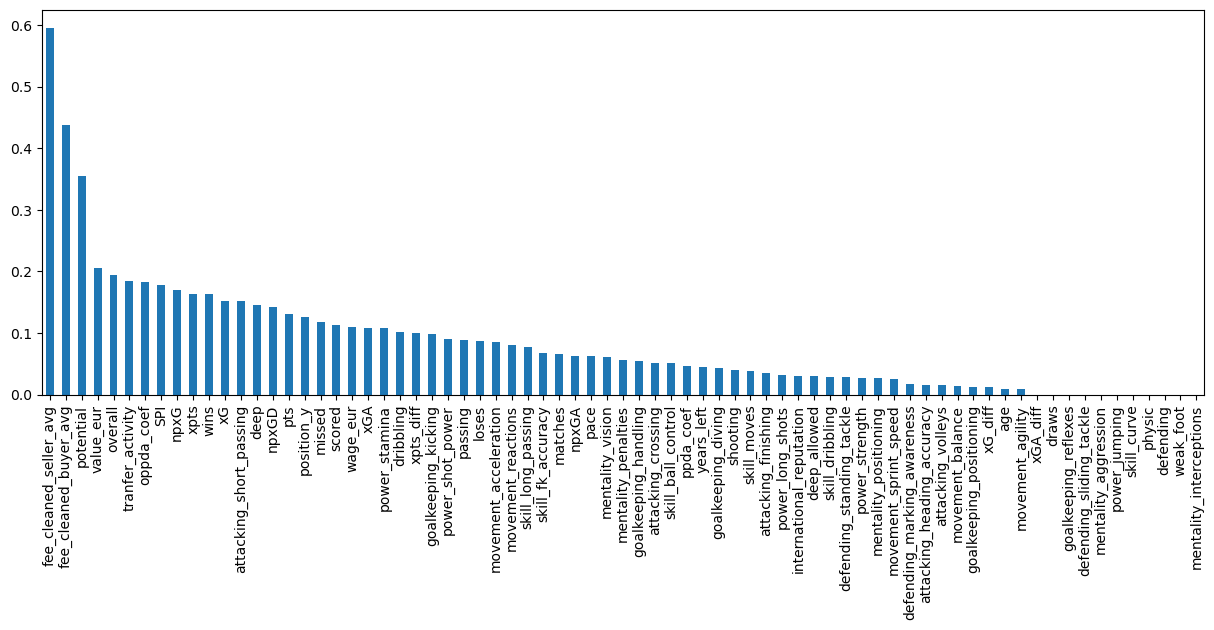

In [524]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [525]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=30)
selected_top_columns.fit(X_train_fee, y_train_fee)
selected_top_columns.get_support()

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True])

In [526]:
X_train_fee.columns[selected_top_columns.get_support()]

Index(['value_eur', 'overall', 'potential', 'dribbling',
       'attacking_short_passing', 'position_y', 'wins', 'scored', 'missed',
       'pts', 'xG', 'npxG', 'xGA', 'npxGD', 'oppda_coef', 'deep', 'xpts',
       'xpts_diff', 'SPI', 'tranfer_activity', 'fee_cleaned_buyer_avg',
       'fee_cleaned_seller_avg'],
      dtype='object')

In [529]:
X_train_fee = X_train_fee[['value_eur', 'overall', 'potential', 'attacking_short_passing',
       'power_shot_power', 'mentality_vision', 'goalkeeping_kicking', 'wins',
       'missed', 'pts', 'xG', 'xGA', 'npxGA', 'npxGD', 'oppda_coef', 'deep',
       'xpts', 'xpts_diff', 'SPI', 'tranfer_activity', 'fee_cleaned_buyer_avg',
       'fee_cleaned_seller_avg']]

X_test_fee = X_test_fee[['value_eur', 'overall', 'potential', 'attacking_short_passing',
       'power_shot_power', 'mentality_vision', 'goalkeeping_kicking', 'wins',
       'missed', 'pts', 'xG', 'xGA', 'npxGA', 'npxGD', 'oppda_coef', 'deep',
       'xpts', 'xpts_diff', 'SPI', 'tranfer_activity', 'fee_cleaned_buyer_avg',
       'fee_cleaned_seller_avg']]

In [ ]:
### Normal LR, performs worse without the filter feature selection; visual?

In [530]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_fee, y_train_fee)
lr.score(X_test_fee, y_test_fee)

0.4169530033254192

In [531]:
from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(lr, X_train_fee, y_train_fee, cv=5)
print(model_scores.mean())

0.64735462334018


## Embedded Methods NEXT: Deal w/ multi-collinearity and how they compare with perfomance to filter methods.

In [450]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(Lasso())
selector = selector.fit(X_train_fee, y_train_fee)

status = selector.get_support()
print("Selection status: ", status)

features = array(boston.feature_names)
print("All features:")
print(features)

print("Selected features:")
print(features[status])
X_train_fee = selector.transform(X_train_fee)

Selection status:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.494e+16, tolerance: 1.385e+13
  model = cd_fast.enet_coordinate_descent(


NameError: name 'array' is not defined

In [495]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 15, random_state=0)
regr.fit(X_train_fee, y_train_fee)
regr.score(X_test_fee, y_test_fee)

# Get numerical feature importances
importances = list(regr.feature_importances_)
print(importances)

[0.03067248081536961, 0.012826873306371847, 0.16163270093111343, 0.022558287306164555, 0.008424022783499569, 0.021104170083230973, 0.00883940791515136, 0.005205411305039056, 0.008220062342703767, 0.007134617092981306, 0.005748553356539739, 0.009681841214053017, 0.012751078079896226, 0.006828190855381849, 0.006837319793430817, 0.0074514481403189226, 0.003914220472050136, 0.016910317348921424, 0.0008773717568332874, 0.001729992350078094, 0.5409180001721742, 0.09973363257869687]


In [462]:
from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(regr, X_train_fee, y_train_fee, cv=5)
print(model_scores.mean())

0.6898849748733976


In [463]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

reg_lin = ElasticNet(random_state=0)
reg_lin.fit(X_train_fee, y_train_fee)
reg_lin.score(X_test_fee, y_test_fee)

/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+16, tolerance: 1.385e+13
  model = cd_fast.enet_coordinate_descent(


0.6599095906238384

In [464]:
from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(reg_lin, X_train_fee, y_train_fee, cv=5)
print(model_scores.mean())

0.6701905441668442


/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.477e+16, tolerance: 1.036e+13
  model = cd_fast.enet_coordinate_descent(
/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.183e+16, tolerance: 9.860e+12
  model = cd_fast.enet_coordinate_descent(
/Users/hedavamsolano/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

In [458]:
from sklearn.ensemble import GradientBoostingRegressor
xgb = GradientBoostingRegressor(n_estimators=10, learning_rate=1.0,
    max_depth=8, random_state=4)
xgb.fit(X_train_fee, y_train_fee)
xgb.score(X_test_fee, y_test_fee)

0.014331232626567547

In [459]:
from sklearn.model_selection import cross_val_score
model_scores = cross_val_score(xgb, X_train_fee, y_train_fee, cv=5)
print(model_scores.mean())

0.33194068747855693


## Model Comparisons + Cross-Validation + Hyperparameter Tuning https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

## Bias Audit: Nationality

In [ ]:
#Motivation

In [ ]:
#avg. tf for all these countries
#are these players just better?

<AxesSubplot: xlabel='nationality_name', ylabel='fee_cleaned'>

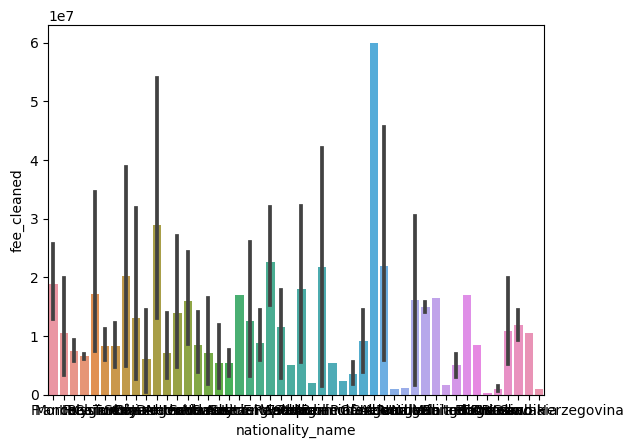

In [140]:
sns.barplot(data =tf2_data_field , x = "nationality_name", y = "fee_cleaned") #just pick the top 5 from the article, groupby -> new dataset

In [ ]:
#need a threshold or tiers

In [ ]:
#base rates



#is the model biased to give them higher transfer fee predictions

<AxesSubplot: xlabel='age', ylabel='fee_cleaned'>

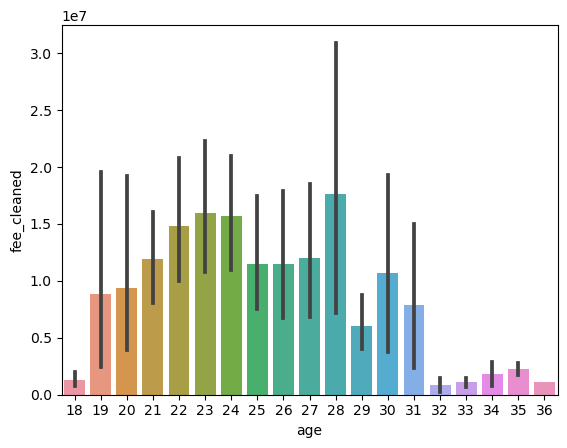

In [198]:
sns.barplot(data = field_tf_upd_train, x = "age", y = "fee_cleaned")

<AxesSubplot: xlabel='Skill_moves', ylabel='Value'>

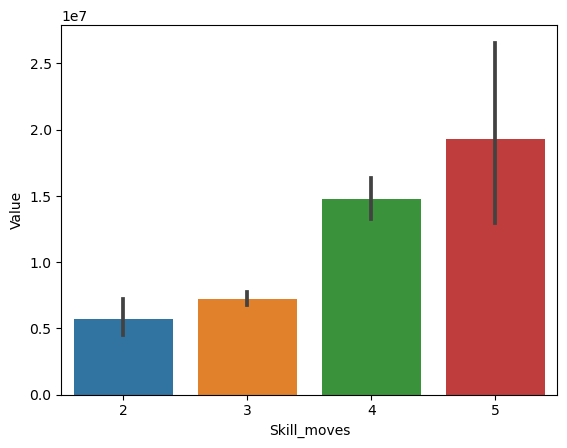

In [198]:
sns.barplot(data = train, x = "Skill_moves", y = "Value")

<AxesSubplot: xlabel='pace', ylabel='fee_cleaned'>

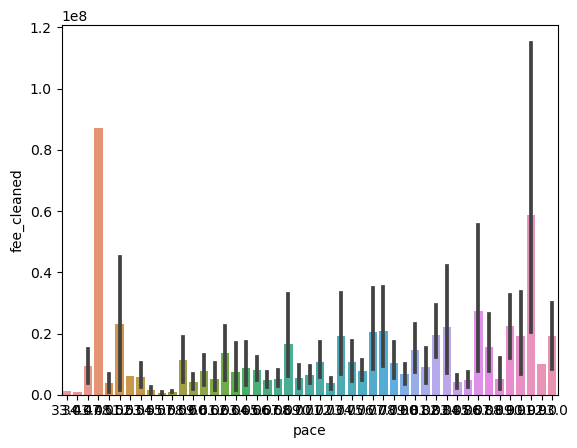

In [410]:
sns.barplot(data = field_tf_upd_train, x = "pace", y = "fee_cleaned")